# Group 4 Employee Pormotion Analysis
Yuting Gong, Anyi Huang, Alice Jiang, Bosoo Kim, Feng Lv

#Table of Content
- I. Introduction (Feng Lv)
- II. EDA (Anyi Huang, Alice Jiang)
  - 1. Gender
  - 2. Age
  - 3. Number of training
  - 4. Previous year rating
  - 5. Department
  - 6. Education
- III.Fairness Analysis (Yuting Gong)
  - 1. Gender & Previous year rating
  - 2. Gender & Promotion
- IV. Workplace Status (Bosoo Kim)
- V. Conclusion (Feng Lv)



```

```

#  Introduction 

We want to take a look into how people are getting promoted in the workplace and what aspects are been taken in to consideration when making the decision. 

With the dataset we found on kaggle, there are more than 10 varibles data being collected to determine the promotion. Some of the attributes are very simple and starightforward while others can be hard to measure and determined consistently.

One that intereted us the most is the previous year work rating of employees. we wanted to see what goes into the rating process and are genders been treated evenly across the board. 



## Code preface

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy import stats
import matplotlib.style as style

### Connect to google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read the data
path = '/content/drive/Shareddrives/BA 840/Promotion data/train.csv'
df = pd.read_csv(path)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


In [ ]:
# drop the columns which are meaningless 
df.drop(columns=['employee_id','region'], inplace=True)

In [ ]:
df.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,Operations,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,Sales & Marketing,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,Sales & Marketing,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,Technology,Bachelor's,m,other,1,45,3.0,2,0,73,0


## EDA

### Gender

Text(0.5, 1.0, 'Gender Count')

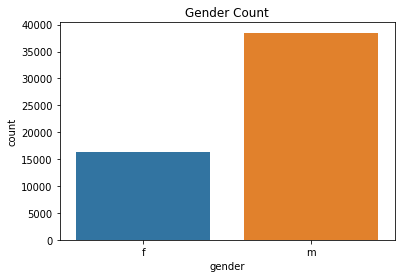

In [ ]:

sns.countplot(x="gender", data=df).set_title('Gender Count')

There are about twice as many male as female in this company


Text(0.5, 0.98, 'Promotion Rate by Gender')

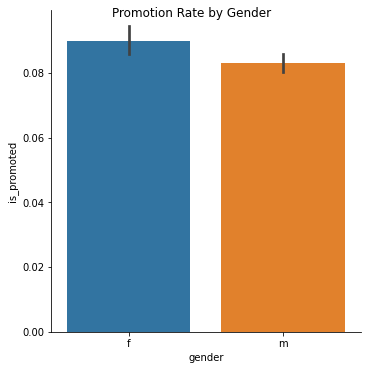

In [ ]:
g = sns.catplot(x="gender", y="is_promoted", kind="bar", data=df)
g.fig.suptitle('Promotion Rate by Gender')

Promotion rate by gender are quite equally dispersed 

### Age

In [ ]:
true_cats = ['department', 'education', 'gender','recruitment_channel','awards_won?', 
             'previous_year_rating','length_of_service', 'no_of_trainings']

true_nums = [c for c in df.columns if c not in true_cats]
true_nums.remove('is_promoted')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

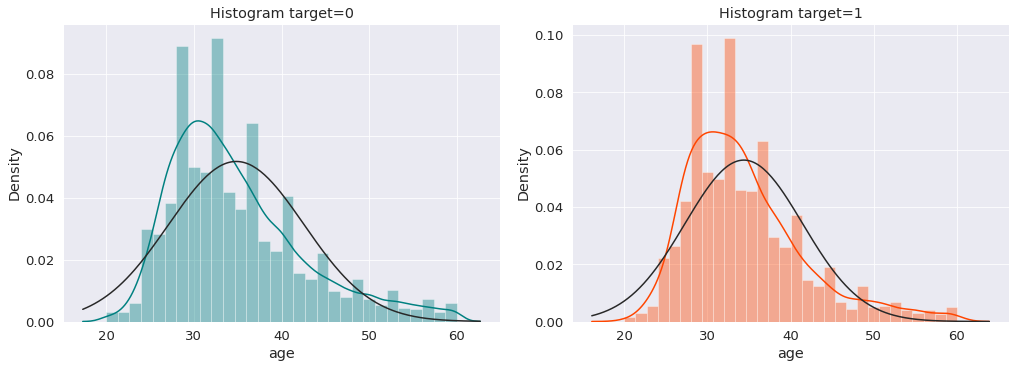

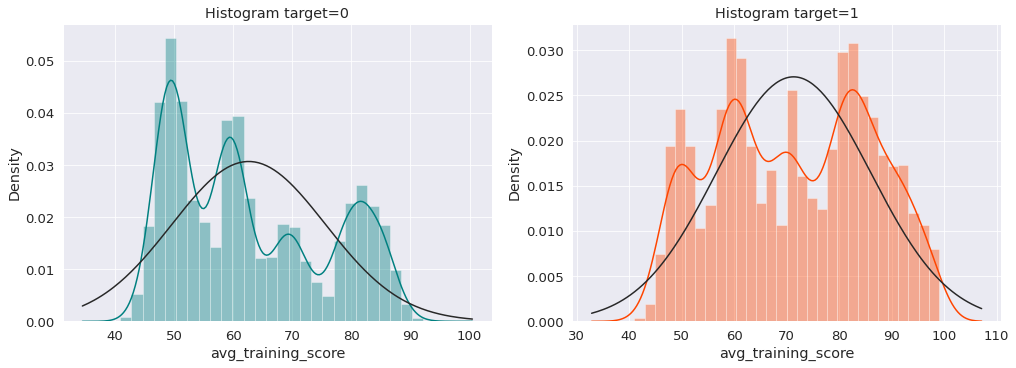

In [ ]:
from scipy.stats import norm

sns.set()
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 1.5})

    
for c in true_nums:
    
    fig = plt.figure(constrained_layout=True, figsize=(14,5))
    grid = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)
    ax1 = fig.add_subplot(grid[0, 0])
    ax1.set_title('Histogram target=0')
    sns.distplot(df[df.is_promoted==0].loc[:,c].dropna(),bins=30, fit=norm, norm_hist=True,color='teal' , ax = ax1)
    ax2 = fig.add_subplot(grid[0, 1])
    ax2.set_title('Histogram target=1')
    sns.distplot(df[df.is_promoted==1].loc[:,c].dropna(), bins=30, fit=norm, norm_hist=True,color='orangered' , ax = ax2)

In [ ]:
df[(df['gender']=='f')&(df['no_of_trainings']>4)][['gender','no_of_trainings','is_promoted']]

,gender,no_of_trainings,is_promoted
548,f,7,0
4916,f,5,0
5021,f,5,0
7285,f,5,0
8058,f,5,0
9059,f,5,0
9394,f,6,0
13110,f,6,0
16812,f,5,0
18743,f,5,0


#### Age + Gender

In [ ]:
promoted = df[df['is_promoted']==1]

Text(0.5, 1.0, 'Gender Difference on Promotion across Age')

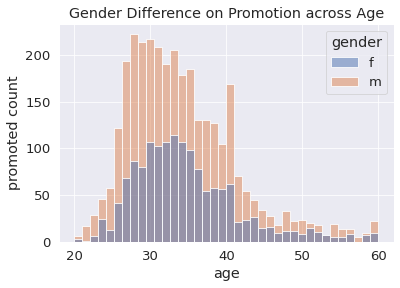

In [ ]:
sns.histplot(data=promoted, x="age", hue="gender")
plt.ylabel("promoted count")
plt.title('Gender Difference on Promotion across Age')

According to the plot above, we found that both male and female tend to get promoted around 28 to 33 years old. In this dataset, there is no significant gender bias on age when considering promotion. 

### Number of training

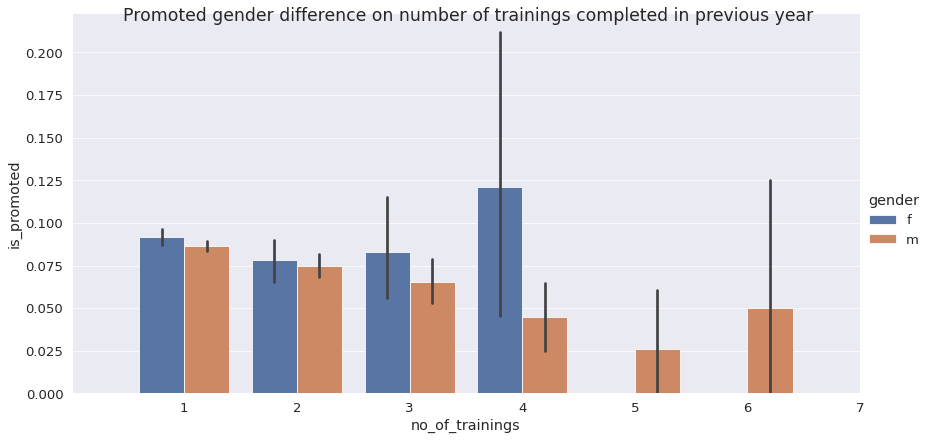

In [ ]:
fig = sns.catplot(x="no_of_trainings", y="is_promoted", hue="gender", kind="bar", data=df, height=6, aspect=2)
fig.fig.suptitle('Promoted gender difference on number of trainings completed in previous year')
fig.set(xlim=(-1, 6))

Female who completed 4 trainings are more likely to be promoted. and female who completed more than 4 training have really low chance to get promoted.

### Previous year rating

Text(0.5, 0.98, 'Previous Year Rating Distribution')

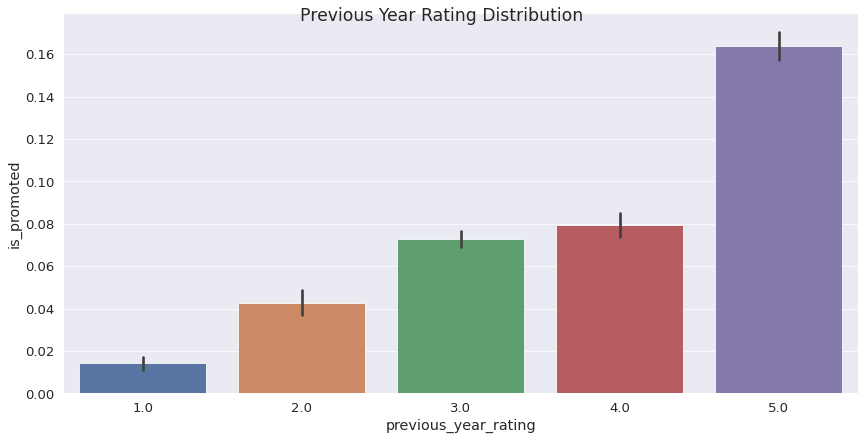

In [ ]:
fig = sns.catplot(x="previous_year_rating", y="is_promoted", kind="bar", data=df, height=6, aspect=2)
fig.fig.suptitle('Previous Year Rating Distribution')

Employees get higher rating in previous year are more likely to be promoted.

Text(0.5, 1.0, 'Previous Year Rating Count in Different Gender')

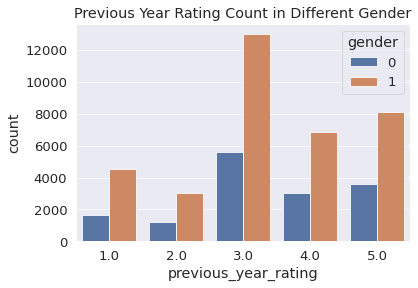

In [ ]:
sns.countplot(x ='previous_year_rating', hue = "gender", data = df).set_title('Previous Year Rating Count in Different Gender')

The count plot demonstrates distribution for male and female across the ratings. Rating score 3 has the highest frequency for both male and female. According to 'Previous Year Rating Distribution', the rating is connected with promotion result. The next plot shows the promotion result for different gender. 

#### Previous year rating + Gender

Text(0.5, 0.98, 'Promoted Gender difference on Previous Year Rating')

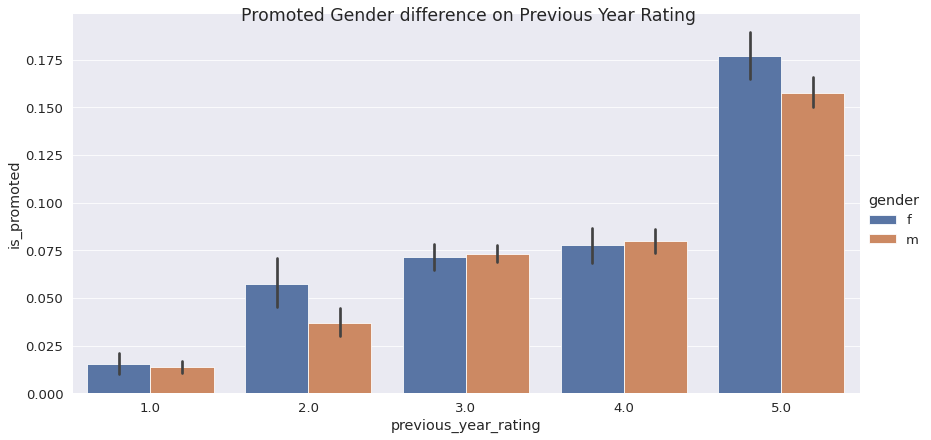

In [ ]:
fig = sns.catplot(x='previous_year_rating', y="is_promoted", hue="gender", kind="bar", data=df, height=6, aspect=2)
fig.fig.suptitle('Promoted Gender difference on Previous Year Rating')

Female are easier to be promoted when they receive extreme ratings (eg. 2 and 5). As for the neutral ratings (3 and 4), there is no difference in male and female. In this dataset, we had more female with rating 5 than that of male. 

We would dive into deeper about how objective features affect the subjective rating score in 'fairness analysis' part.

### Department

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

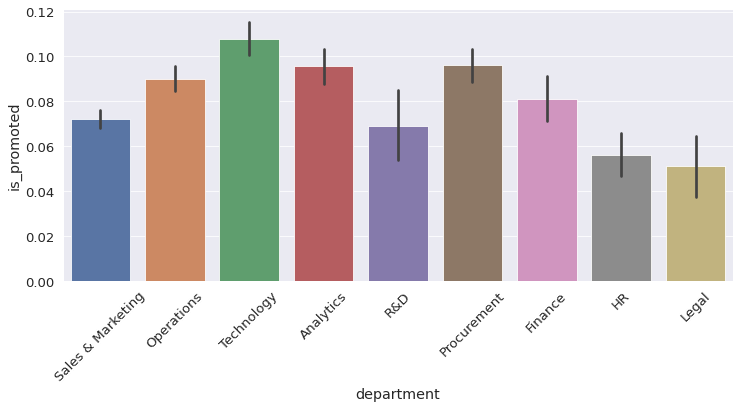

In [ ]:
# department & promotion
plt.figure(figsize=(12,5))
sns.barplot(x='department',y='is_promoted', data=df)
plt.xticks(rotation=45)

#### Department + Gender

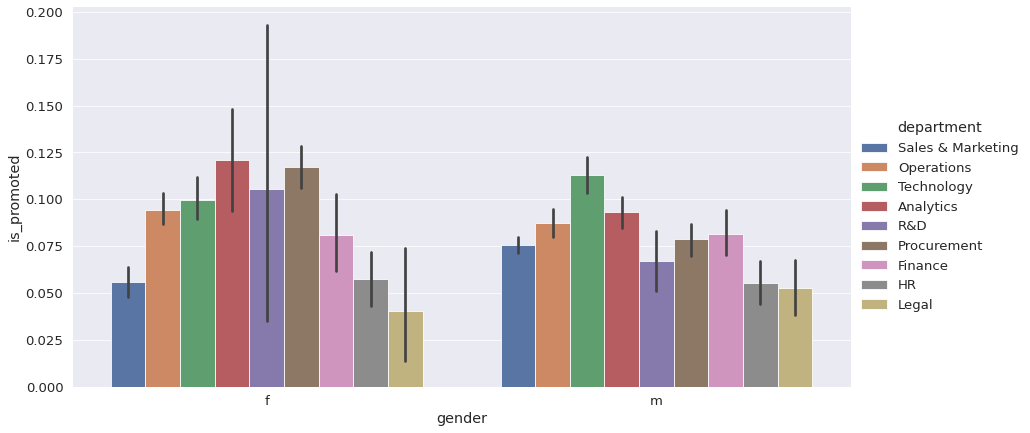

In [ ]:
sns.catplot(x="gender", y="is_promoted", hue="department", kind="bar", data=df, height=6, aspect=2)

Male employees are more likely to be promoted in Technology department. As for female employees, Analytics and Procurement departments are easier to be promoted.

Unlike male employees, female employees in Technology department are not that often to be promoted. However, male population are double than that of female in this dataset. The gender difference may cause by the unbalanced data.

### Education

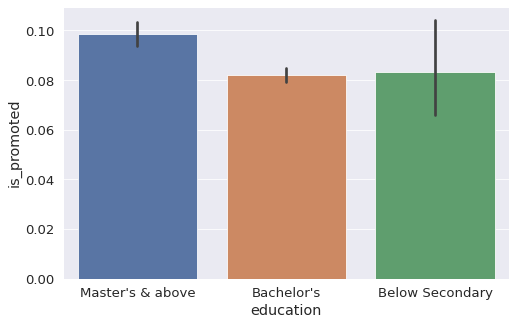

In [ ]:
#education & promotion
plt.figure(figsize=(8,5))
sns.barplot(x='education',y='is_promoted',data=df)

#### Department + Education

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text major ticklabel objects>)

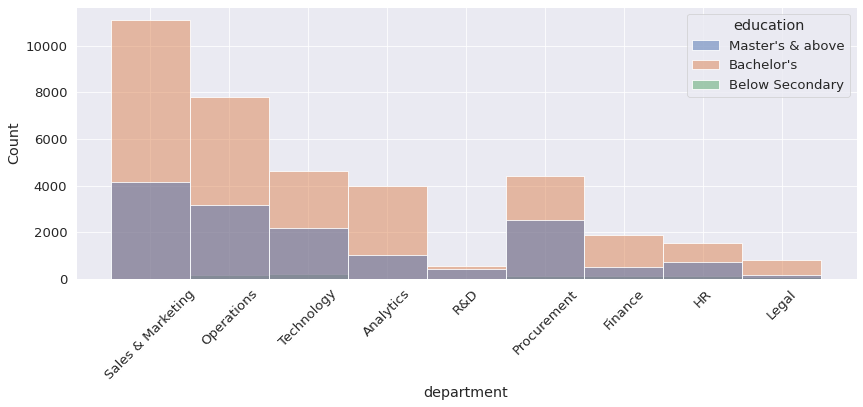

In [ ]:
# what department have higher education level
plt.figure(figsize=(14,5))
sns.histplot(x='department',data=df,hue='education')
plt.xticks(rotation=45)

# Fairness Analysis

### Gender & Previous year rating

In [ ]:
# change the categorical feature into numeric
from sklearn.preprocessing import LabelEncoder
df_copy = df.copy()
df_copy = df_copy.dropna()
labelencoder = LabelEncoder()
df_copy['department'] = labelencoder.fit_transform(df_copy['department'])
df_copy['education'] = labelencoder.fit_transform(df_copy['education'])
df_copy['gender'] = labelencoder.fit_transform(df_copy['gender'])
df_copy['recruitment_channel'] = labelencoder.fit_transform(df_copy['recruitment_channel'])
df_copy['gender'] = labelencoder.fit_transform(df_copy['gender'])
df_copy['is_promoted'] = df_copy['is_promoted']
df_copy.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,7,2,0,2,1,35,5.0,8,0,49,0
1,4,0,1,0,1,30,5.0,4,0,60,0
2,7,0,1,2,1,34,3.0,7,0,50,0
3,7,0,1,0,2,39,1.0,10,0,50,0
4,8,0,1,0,1,45,3.0,2,0,73,0


In [ ]:
from sklearn.preprocessing import Normalizer
# standardize the dataset to fit the t-test function
nl = Normalizer().fit_transform(df_copy)
df_n = pd.DataFrame(nl,columns = df_copy.columns)
df_n.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,0.113961,0.03256,0.000000,0.032560,0.016280,0.569803,0.081400,0.130241,0.0,0.797724,0.0
1,0.059241,0.00000,0.014810,0.000000,0.014810,0.444310,0.074052,0.059241,0.0,0.888621,0.0
2,0.114021,0.00000,0.016289,0.032577,0.016289,0.553816,0.048866,0.114021,0.0,0.814436,0.0
3,0.108322,0.00000,0.015475,0.000000,0.030949,0.603510,0.015475,0.154746,0.0,0.773731,0.0
4,0.092791,0.00000,0.011599,0.000000,0.011599,0.521952,0.034797,0.023198,0.0,0.846722,0.0


In [ ]:
# Calculate P-value
# To see whether gender is statistically significantly
import statsmodels.formula.api as sm

log_gender = df_n[['department','education','recruitment_channel','no_of_trainings','length_of_service','awards_won?','avg_training_score','gender','previous_year_rating']]
model = sm.logit('previous_year_rating ~ gender+department+education+recruitment_channel+no_of_trainings+length_of_service+avg_training_score',data = log_gender)
result=model.fit()
print(result.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.062120
         Iterations 7
                            Logit Regression Results                            
Dep. Variable:     previous_year_rating   No. Observations:                48660
Model:                            Logit   Df Residuals:                    48652
Method:                             MLE   Df Model:                            7
Date:                  Thu, 27 May 2021   Pseudo R-squ.:                     inf
Time:                          00:27:12   Log-Likelihood:                -3022.8
converged:                         True   LL-Null:                        0.0000
Covariance Type:              nonrobust   LLR p-value:                     1.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -2.1147      0.420     -5.035      0.000      -2.93

/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:3390: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


We can see aboce that gender is not statistically significant. And we can conclude that previous year rating is fair regarding to gender.

### Gender & Promotion

we still suspect the fairness of getting promotion regarding to male and female employers. Because, previous year rating is just one of many factors that would influence the promotion result. So we analyzed directly with promotion.

In [ ]:
# We use logistic regression to predict the promotion result.
import numpy as np
from sklearn.linear_model import LogisticRegression

In [ ]:
# Firstly, we need to predict the promotion result without gender
df_without_gender = df_copy.drop('gender',axis=1)

In [ ]:
# set the target and the features
y = df_without_gender.pop('is_promoted')
X = df_without_gender

In [ ]:
# Fit the model
log = LogisticRegression()
log.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# predict the results
y_pred1 = log.predict(X)
X['y_prep'] = y_pred1

In [ ]:
# add the predicted result back to the dataset
df_copy['model1_prep'] = X['y_prep']

In [ ]:
# In the second model, we need to predict the result with gender as predicting feature
df_with_gender = df_copy.copy()

In [ ]:
df_with_gender.drop('is_promoted',inplace = True,axis =1)

In [ ]:
# Set the target and the predicting features.
y = df_with_gender.pop('model1_prep')
X = df_with_gender

In [ ]:
# Fit the model
log = LogisticRegression()
log.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Predict the results
from sklearn.metrics import confusion_matrix
y_pred2 = log.predict(X)

In [ ]:
# Add the predicted results back to the dataset
df_copy['with_gender_prep'] = y_pred2

In [ ]:
class_names=np.array(['0','1'])

# Function to plot the confusion Matrix
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.YlOrBr):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = 'd' 
    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            
            plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

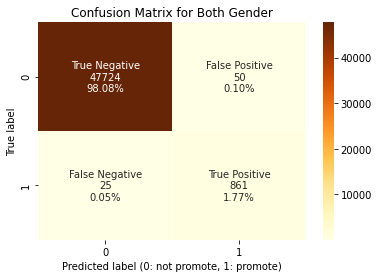

In [ ]:
#############################################################################
cm = confusion_matrix(df_copy['model1_prep'], df_copy['with_gender_prep'])

group_names = ["True Negative","False Positive","False Negative","True Positive"]
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt = '', cmap=plt.cm.YlOrBr)
plt.xlabel("Predicted label (0: not promote, 1: promote)")
plt.ylabel("True label")
plt.title("Confusion Matrix for Both Gender")
plt.show()

In [ ]:
# Calculate the recall score
from sklearn.metrics import recall_score
recall_score(y, y_pred2)

0.9717832957110609

In [ ]:
# Male group
gender0 = df_copy[df_copy['gender']==0]

In [ ]:
# Female group
gender1 = df_copy[df_copy['gender']==1]

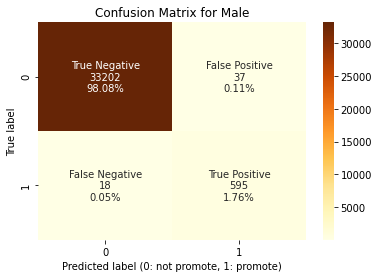

In [ ]:
#############################################################################
cm = c(gender1['model1_prep'], gender1['with_gender_prep'])

group_names = ["True Negative","False Positive","False Negative","True Positive"]
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt = '', cmap=plt.cm.YlOrBr)
plt.xlabel("Predicted label (0: not promote, 1: promote)")
plt.ylabel("True label")
plt.title("Confusion Matrix for Male")
plt.show()

In [ ]:
gender0_true1_predict1 = gender0[(gender0['model1_prep']==1)& (gender0['with_gender_prep']==1)]['with_gender_prep'].count()

In [ ]:
gender1_true1 = gender1[gender1['model1_prep']==1]['with_gender_prep'].count()


In [ ]:
gender1_true1_predict1 = gender1[(gender1['model1_prep']==1)& (gender1['with_gender_prep']==1)]['with_gender_prep'].count()


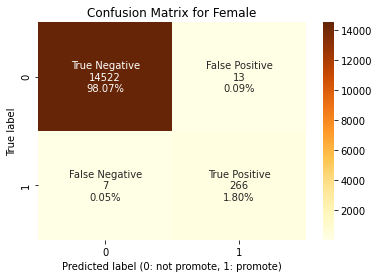

In [ ]:
#############################################################################
cm = confusion_matrix(gender0['model1_prep'], gender0['with_gender_prep'])

group_names = ["True Negative","False Positive","False Negative","True Positive"]
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt = '', cmap=plt.cm.YlOrBr)
plt.xlabel("Predicted label (0: not promote, 1: promote)")
plt.ylabel("True label")
plt.title("Confusion Matrix for Female")
plt.show()

The both gender group's recall value is 0.97. And we filtered the male group and female group to calculate the recall. As we can see  the recall for both male and female are the same. So there is no gender discrimination when evaluating the promotion in this dataset.

# Workplace Status

I found some interesting data about the gender bias in the workplace. According to the Glassdoor research, the percentages of female employees at major tech companies are still not at parity to male employees. Here is the number.
Twitter: 43%, Facebook: 37%, Apple: 34%, Google: 32%, Intel: 26%. In addition, women make up total 45% of employees of S&P 500 companies. However, females employees are only make up 6% of CEO, 27% of Senior level managers. 

Moreover, women are more likely to receive critical feedback, 88%, compared to 59%  for men. At the same time, these feedbacks are more based on their personality traits. One of our research also showed that reviews for women had vague praise more often than reviews for men (57%, compared with 43% for men). Here is an example of the feedback: “You had a great year” populated many women’s reviews.

# Conclusion 

Whenever an evaluation or rating process is conducted by people in the work place there are possibilities of human bias and unfairness involved. To best eliminate the bias possibility, one should alway consider additional steps and extra procedures to improve the evaluation.
